# Using Machine Learning Tools 2020
# Assignment 3: Deep Neural Networks

## Overview

In this assignment you will implement two types of deep learning network (fully connected and convolutional neural networks) to classify images of hands in poses corresponding to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train two different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore different cases of over-fitting and under-fitting, and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing optimised deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, and optimize performance. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General Instructions 

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, as indicated in this template.
 - Your code must use the current stable versions of python libraries, not outdated versions.
 - All data processing must be done within the notebook after loading the data.
 - Comment your code, so that its purpose is clear to the reader.
 - **Before submitting your notebook, make sure to run all cells in your final notebook so that it works correctly.**

This assignment is divided into several tasks. Stick to this notebook format, although feel free to add cells throughout, but keep the same numbering for all instructions, questions and answers.

Make sure to answer every question with *separate answer text (“Answer: ...”) in a cell* and check that you answered all sub-questions/aspects within the question. The text answers are worth points.

Make the *figures self-explanatory and unambiguous*. Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

## Outline

The main steps in the assignment are outlined here, so that you can appreciate the bigger picture. Some of the steps are purely for testing your knowledge and demonstrating certain things, but in general it outlines the main process that you would go through to solve a practical problem.

- To start with we load the data, visualise and explore it. You should always do this in any problem.

- After this we will establish how long a simple network takes to run on a given amount of training data on your computer. This is important for this assignment as you have to run on your own machines, and we need to make sure it runs in a reasonable amount of time. In a practical problem you are likely to have a lot more data and will use bigger networks, but it is common that you will have a limit on the available resources and time, so establishing a baseline timing and deciding on constraints is a very common task in any problem.

- Following this we will go through a few specific cases, looking at some extremes and learning to identify common problems, how to spot them and options for how to correct for them.

- Afterwards, the main bulk of the assignment will focus on tuning the networks to give the best performance. This is something you will need to do systematically, and demonstrates the approach that you would take in any practical problem. Some limitations will be given, in order to help you in this assignment, but it should be clear how to extrapolate these to a more general setting for other datasets and tasks.

- Once the optimal network is found, the performance will be evaluated.

- A free choice element at the end will allow you to explore one extra aspect, beyond the limitations imposed above.


Feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

## Your Details

#### Write your name and ID here
Moaz Mohamed

A1779177

## Initialise environment

In [1]:

# Common imports
import numpy as np
import os, time
import pandas as pd

# # Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

---

## 1. Explore the Dataset (10%)

### 1.1 Load the data
 - We will use an MNIST-style dataset of sign language signals (hands), which are all small images (28x28)
 - Files are sign_mnist_train.csv and sign_mnist_test.csv
 - Split up labels and images
 - Reshape images appropriately

In [2]:
data_train = pd.read_csv("f_train.csv")
data_test = pd.read_csv("f_test.csv")

### 1.2 Look at the data
- Print out some descriptive information about the dataset
- Show one example image of each class

In [3]:
data_train.head(50)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
data_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
num2alpha={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',
           17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}
y_train = data_train['label']
X_train = data_train.drop(columns=['label'])

y_train1 = y_train.to_numpy()
X_train1 = X_train.to_numpy()

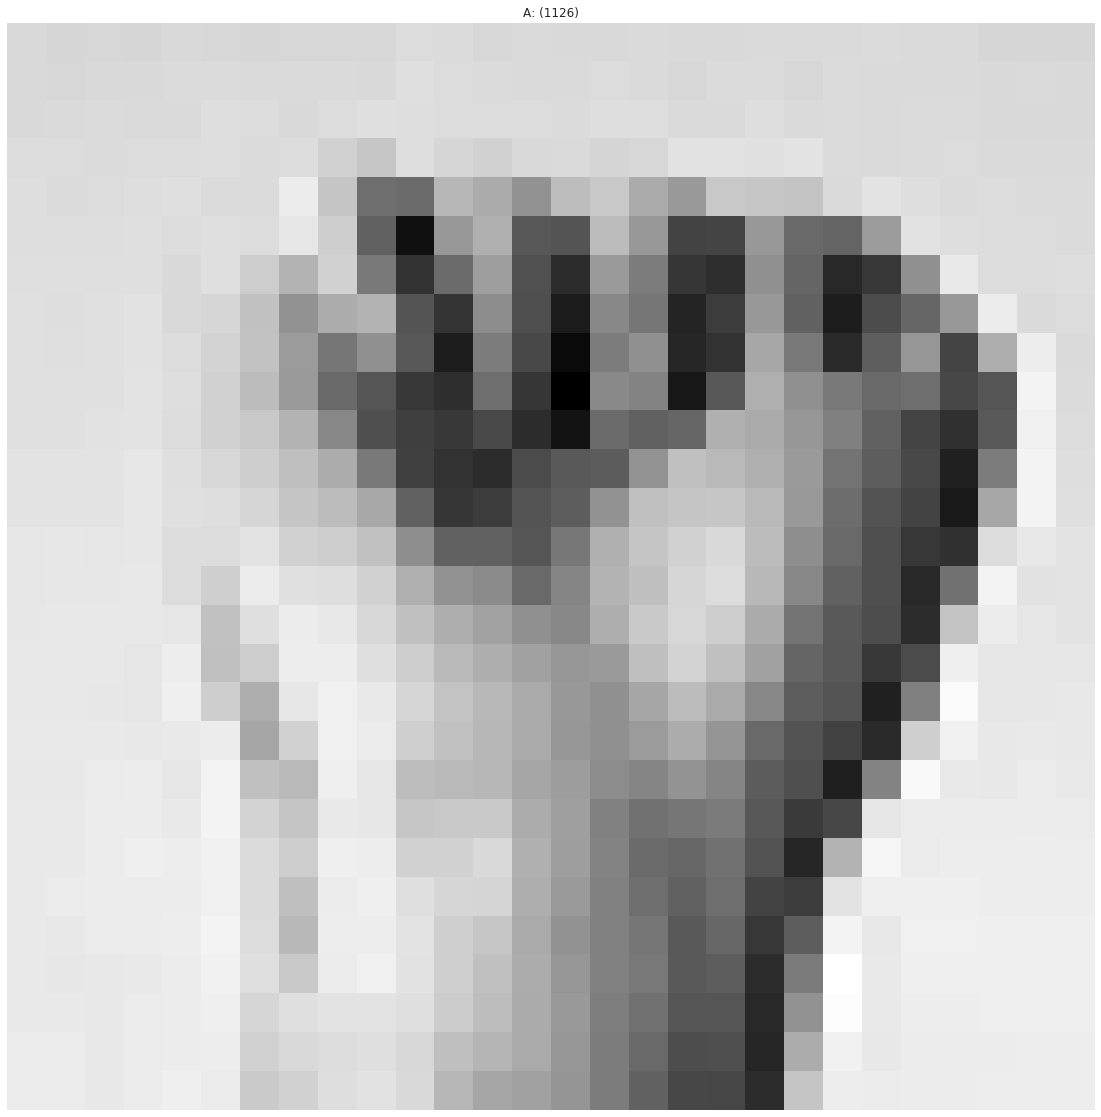

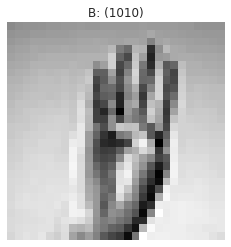

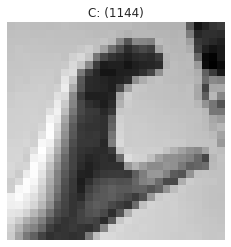

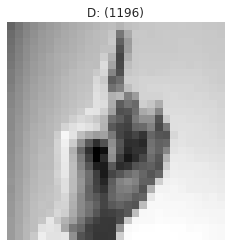

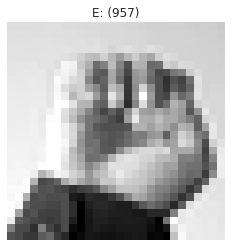

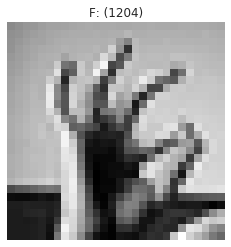

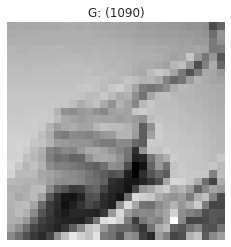

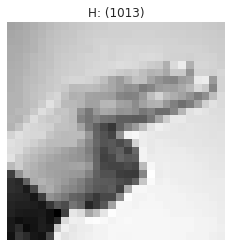

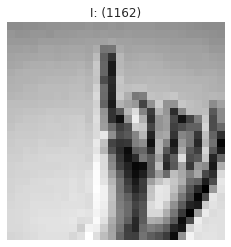

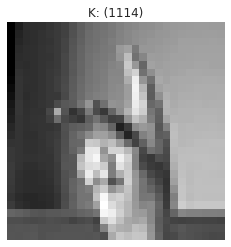

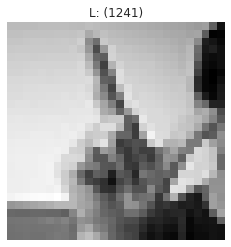

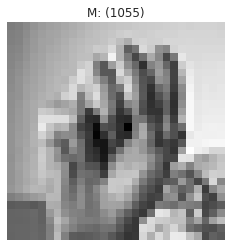

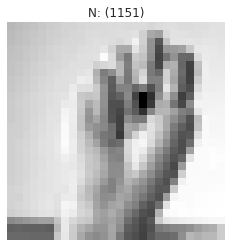

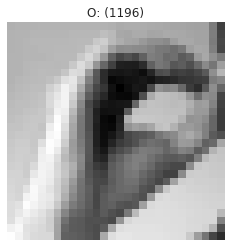

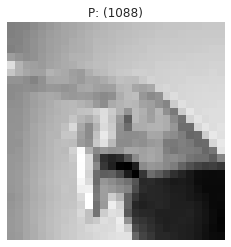

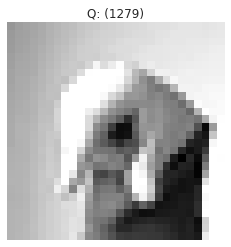

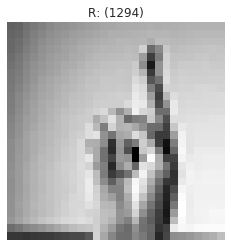

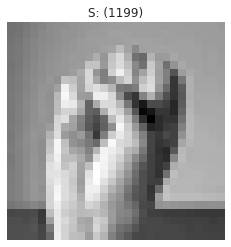

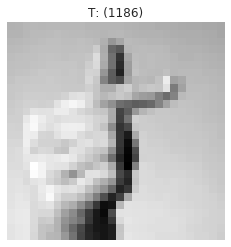

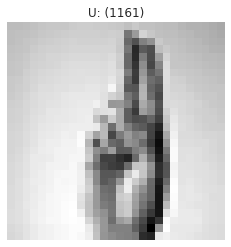

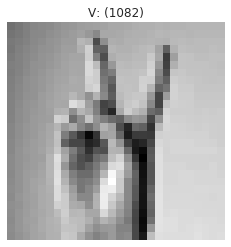

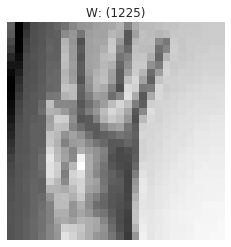

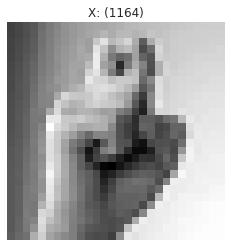

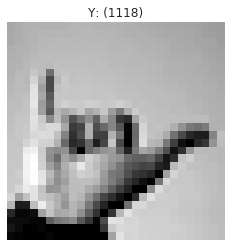

In [6]:
unique_labels = set(y_train)
plt.figure(figsize=(20,20))

i = 1 
for label in unique_labels:
    image = X_train1[y_train1.tolist().index(label)]
    plt.axis('off')
    plt.title("{0}: ({1})".format(num2alpha[label], y_train1.tolist().count(label)))
    i += 1
    image = image.reshape((28,28))
    _ = plt.imshow(image, cmap='gray')
    plt.show()

### Question 1.3
- Which pair of classes do you think will be the most difficult to distinguish?  Give a reason for your answer.

In [7]:
# classes M and N. hence they are quite similar in shape. 

### 1.4 Look at the labels
- Look at the distribution of the labels
- Adjust for anything that could cause problems later on

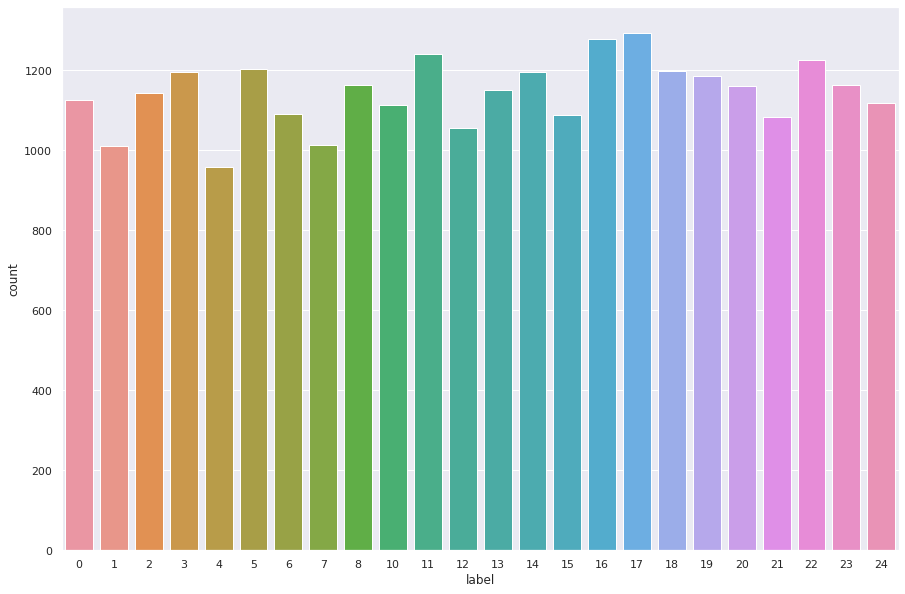

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(data_train['label'])

### 1.5 Split the data (test, validation and training) and scale it
- We will only take the first 2500 training images (which is still over 100 per class) in order to keep run-times down and to make training more challenging. In a practical situation you might either have less data than you'd like or limitations on how much can be processed, so this also reflects a common real-life constraint.
- In this case we will create both the validation and test sets from the testing dataset.  It is unusual to do this, but in this case the training set contains a lot of non-independent, augmented images and it is important that the validation images must be independent. 
- Take 1000 images each for the validation and test sets.
- Scale the data appropriately (e.g. as done for other MNIST datasets).

In [9]:
# code here
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()



data_train_lw  = data_train.iloc[0:2500] 
X_train = data_train_lw.drop(columns = ['label'])
y_train = data_train_lw['label']


y_train_1 = label_binrizer.fit_transform(y_train)

X_train_np_cc = ((X_train.copy().to_numpy())/255.0).reshape((-1, 28, 28, 1))
X_train_np_nn = ((X_train.copy().to_numpy())/255.0).reshape((-1, 28, 28))

y_train_np = ((y_train_1))

test_set = data_test[:1000]

X_test = test_set.drop(columns=["label"])
y_test = test_set['label']

y_test1 = label_binrizer.fit_transform(y_test)


X_test_np_cc = ((X_test.copy().to_numpy())/255.0).reshape((-1, 28, 28, 1))
X_test_np_nn = ((X_test.copy().to_numpy())/255.0).reshape((-1, 28, 28))
y_test_np = y_test1


validation_set = data_test[2000:3000]

X_valid = validation_set.drop(columns=['label'])
y_valid = validation_set['label']


y_valid1 = label_binrizer.fit_transform(y_valid)


X_valid_np_cc = ((X_valid.copy().to_numpy())/255.0).reshape((-1, 28, 28, 1))
X_valid_np_nn = ((X_valid.copy().to_numpy())/255.0).reshape((-1, 28, 28))

y_valid_np = y_valid1

In [10]:
len(y_valid)
# y_train_np.shape

1000

In [11]:
data_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


### 1.6 Look at label distribution
- Check the label distribution in all three sets and if there are problems, change the selection above.

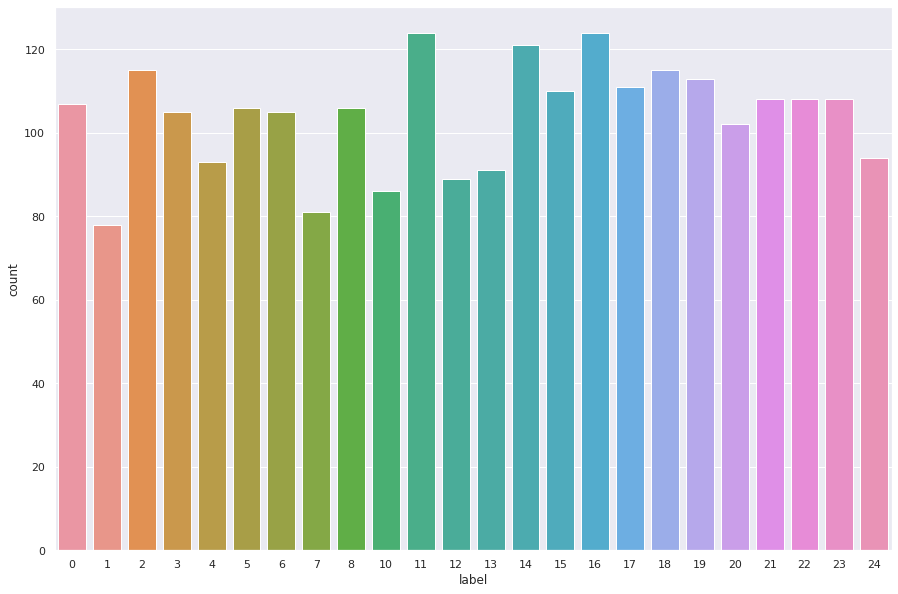

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(y_train)

***

## 2. Initial Deep Learning Networks (30%)

In this section you will look at a variety of networks with this data and explore various settings and outcomes.

### Question 2.1
 - We will treat this as a classification problem but we could formulate it as a regression problem instead (predicting the label values as the outcomes). Name one disadvantage that a regression approach would have.

### Answer question 2.1 here (no code required)
A Classification problem can be treated as a regression by applying a hard threshold. 

for example in logstic regression it outputs probablity. if the output if the regression is more than 40% or so then its class A assuming there is a clear seperation between the different classes. 

BUT 

that might be work for in training but when applying the model in the field and a new instance doesnt satisfy the assumptions of the regiression model you will have to update the model threshholds with every new instance that disobey the model assumptions or the hard coded thresholds rules.

### Question 2.2
 - What is chance level accuracy (e.g. if predictions were completely random) in this case?

In [13]:

# assuming random selection

rand_acc = 1/24.0

print("level accuracy if predictions were completely random", rand_acc)

level accuracy if predictions were completely random 0.041666666666666664


### 2.3 Timing Test
 - We will start to work out how long it takes to train a moderately sized network on your machine
 - Build a convolutional neural network (CNN) with the following specifications:
   - All filter (kernel) sizes are 3x3
   - Initial Conv2D layer with 64 filters
   - MaxPooling layer following this
   - Second Conv2D layer with 128 filters
   - Dense output layer after this
 - Set the number of epochs to **20** this time (we will use early stopping methods later but **not** now)
 - Set the batch size to 50
 - Use the *Adam* optimiser, with its default learning rate (we will use the Adam optimiser throughout this assignment)
 - Use the *ELU* activation function for the hidden layers (this will be used throughout)
 - Training/Validation/Testing set sizes are 2500/1000/1000, as described above
 - Use time.time() to determine how long it takes to train your network
 - Plot your learning curves (loss functions and accuracies for training and validation)
 - Calculate the accuracies of the network on both the validation and test datasets
 
If this run takes less than 10 minutes then continue with these settings. If it takes much longer than 10 minutes then reduce the number of training points until it is close to 10 minutes. In the case that you cannot achieve this without reducing the number of training points to less than 250, please contact a course organiser, as you may need to use alternative computational resources.

In [14]:
from numpy.random import seed
seed(42)
# Some key parameters
n_train = 2500
n_valid = 1000

actfn = "elu"

optimizer = keras.optimizers.Adam
learningrate = 0.001   

batch_size = 50
n_epochs = 20
np.random.seed(42)
tf.random.set_seed(42)

In [15]:

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=actfn,kernel_initializer="he_uniform", padding="same", 
                                  input_shape=[28, 28, 1])) 
model.add(keras.layers.MaxPooling2D(pool_size=2)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation=actfn)) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(24, activation = "softmax"))
model.compile(loss="categorical_crossentropy", optimizer=optimizer(lr=learningrate), metrics=["accuracy"])

In [16]:
#%timeit history = model.fit(X_train_np, y_train_np, epochs=n_epochs,validation_data=(X_valid_np, y_valid_np))
# 3.52 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [17]:
history = model.fit(X_train_np_cc, y_train_np, epochs=n_epochs,
                    validation_data=(X_valid_np_cc, y_valid_np))

Epoch 1/20
79/79 [==============================] - ETA: 0s - loss: 3.2557 - accuracy: 0.06 - ETA: 0s - loss: 6.0180 - accuracy: 0.06 - ETA: 0s - loss: 4.5331 - accuracy: 0.16 - ETA: 0s - loss: 3.6627 - accuracy: 0.27 - ETA: 0s - loss: 3.0942 - accuracy: 0.34 - ETA: 0s - loss: 2.8518 - accuracy: 0.38 - 4s 49ms/step - loss: 2.8518 - accuracy: 0.3808 - val_loss: 1.3215 - val_accuracy: 0.6120
Epoch 2/20
79/79 [==============================] - ETA: 0s - loss: 1.0501 - accuracy: 0.75 - ETA: 0s - loss: 0.9952 - accuracy: 0.67 - ETA: 0s - loss: 0.8961 - accuracy: 0.70 - ETA: 0s - loss: 0.7927 - accuracy: 0.74 - ETA: 0s - loss: 0.7147 - accuracy: 0.77 - 0s 4ms/step - loss: 0.6921 - accuracy: 0.7856 - val_loss: 0.8613 - val_accuracy: 0.7470
Epoch 3/20
79/79 [==============================] - ETA: 0s - loss: 0.3884 - accuracy: 0.87 - ETA: 0s - loss: 0.3956 - accuracy: 0.89 - ETA: 0s - loss: 0.3918 - accuracy: 0.89 - ETA: 0s - loss: 0.3689 - accuracy: 0.90 - ETA: 0s - loss: 0.3484 - accuracy: 0.

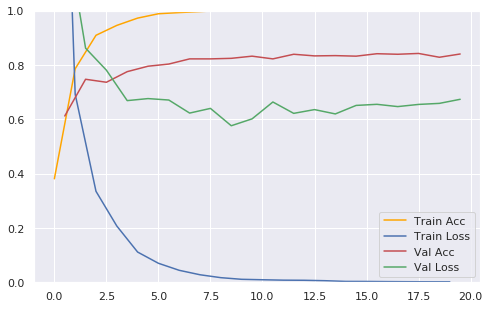

In [18]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,n_epochs),history.history['accuracy'], color='orange')
plt.plot(np.arange(0,n_epochs),history.history['loss'],'b')
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_loss'],'g')
plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show() 

### 2.4 Initial Network Exploration
- We will now look at a couple of imperfect cases to get a feeling for what happens in different training situations

### Question 2.5
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

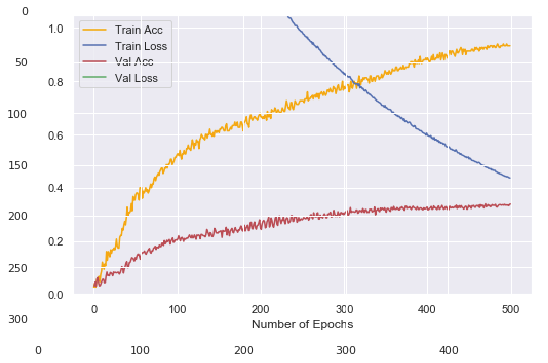

In [19]:
im = plt.imread('LearningPlot1.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

#### Answer question 2.5 here (no code required)

the model is over-fitting. and havent converged yet. 

reasons: the big gap between the train_acc and val_acc. with train_acc having high accurancy throughout the        training and low accuracy in val_acc. which are signs of overfitting.


### Question 2.6
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

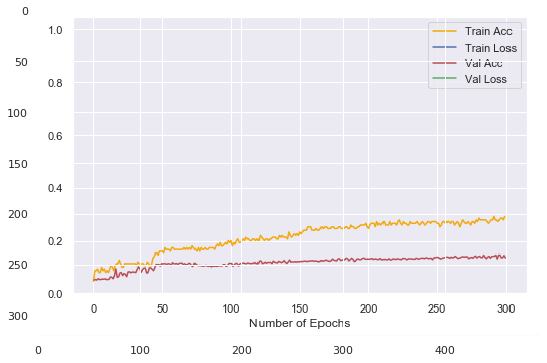

In [20]:
im = plt.imread('LearningPlot2.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

#### Answer question 2.6 here (no code required)

the model in this case is either overfitting or underfitting. 

reasons : the gap between the train_acc and val_acc not as big as the previous model. but as the number of epoch increases the the gap between train_acc and val_acc increases and from the figure there isnt any signs of both curves decreasing the gap between the two. 

but at the same time 

the model does have such low accuracey for both val_acc and train_acc despite the high number of epoch already performed. 


the loss curves for both val and train should give an indication either its overfitting or underfitting. 



### Question 2.7
 - Name something that you could do to alleviate problems due to (a) overfitting and (b) underfitting. Provide separate answers for (a) and (b).

#### Answer question 2.7 here (no code required)

overfitting : decreasing the number of parameters should help or adding a dropout layer. 

underfitting: increasing the number of parameters of the model.

***

## 3. Main Network Optimisation (50%)

In this section you will undertake the main task of going through the process to find a deep learning solution to this problem that is (within limits) optimised to this specific case.

The following settings for the networks will be fixed:
 - Batch size of 50
 - Maximum number of epochs of 100, but implement *early stopping*
 - Use the *Adam* optimiser
 - Use the *ELU* activation function for all hidden layers (although ReLU is very common, we will explore ELU for this assignment)
 - Use the He Uniform initialization for weights (pass *kernel_initializer="he_uniform"* into the layer specifications)
 - Training/Validation/Testing set sizes are 2500/1000/1000 as described above (with the validation set derived from the original test dataset) unless you needed to reduce the training set size based on your timing tests

You will investigate **both** fully connected and CNN architectures, with the following possibilities:
 - **Number of hidden or Conv2D layers** can be **1, 2 or 3**, but no more (this does *not* count the final dense layer in a CNN)
 - **Number of hidden nodes** (fully connected network) or **number of filters** (in a Conv2D layer of a CNN) can be: **32, 64, 128 or 256** (no other values can be used)
 - A constant **learning rate** should be used (no varying schedules) where the value can be adjusted to be **0.1, 1.0, 10.0 and 100.0** **times the default rate** (these are the only values you can use)
 - CNN architectures will always follow the pattern of Conv2D followed immediately by MaxPooling, with the dense layer following the final Conv2D: e.g. C2-D or C2-MP-C2-D or C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense) - note that this is the same pattern used in the code from workshops 8, 9 and 10

Note that the patience setting in the early stopping can be adjusted, but is not considered a "parameter" as such.

A fixed training/validation/test split will be used throughout.

The objective is for you to go through a systematic process for finding a good network that could be adapted to work for other problems. It is the process, rather than the final results, that are more important here (it is not a competition based on results, but an exercise in learning how to approach such problems in a good way). So clearly explain your process, document your code and show appropriate results as you go. In particular, make a summary at the end, in a separate cell, of all the learning rate curves and any other key pieces of information that you used for comparing models and parameter settings.

Remember that the following exploration options exist:
 - Random search through parameter space (noting that here most of the "parameters" are ones that specify the network architecture)
 - Grid search
 - Individual parameter sweeps (varying only one parameter whilst keeping others fixed)
 - These can also be combined together and/or iterated
 
Before writing any code, answer the following two questions and, after that, design and implement your optimisation process to select the "best" network.

### Question 3.1
- What approach will you take to this optimisation?  Summarise your main strategy (or strategies) in a few lines here, pointing out any major advantages or disadvantages.

#### Answer question 3.1 here (no code required)

i will be utilizing keras tuner package to perfrom random search for number of parameters, number of neurons, number of layers and learning rate. since keras tuner is compatible with keras package using and varying different parameters is easy and doesnt require comblicated nested loops. but a large number of parameters sweeps can take a long time to evaluate 


### Question 3.2
 - When comparing models (either completely different networks or just two networks with different options/parameter settings), what is the best metric to use: accuracy or loss? And should it be calculated on the training set, validation set or test set?  Give reasons for your answer.

### Answer question 3.2 here (no code required)
for FCN number of layers, number of neourns and learning rate will be varied. 
for CNN number of neourns and learning rate only will be varied.

accuracey and loss will be calculated on both training and validation sets and the best scoring model will be evaluated on the testing set to explore the perfomrce on unseen data.


the metric will be accuracy with max number of epochs but early stopping will be used also to get the best perfoming model and prevent getting a overfitting model. the keras tuner objective have been set to validation accuracy. 

### 3.3 Now write the code for this section, and below that, in a separate cell, summarise your results.

In [21]:
# Some key parameters
n_train = 2500
n_valid = 1000

actfn = "elu"

optimizer = keras.optimizers.Adam
learningrate = 0.001   
batch_size = 50
n_epochs = 100
np.random.seed(42)
tf.random.set_seed(42)

### FCN Tuning

In [22]:
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch




def build_model(hp):  
    model = keras.models.Sequential()   
    model.add(keras.layers.Flatten(input_shape = [28 , 28]))   
    model.add(keras.layers.Dense(hp.Choice('units', [32, 64, 128 , 256 ])
                                  , activation = "elu",kernel_initializer="he_uniform")) 
    for i in range(hp.Int('num_layers', 1, 2)):
        model.add(keras.layers.Dense(hp.Choice('units_' + str(i),
                                            [32, 64, 128 , 256] ),
                               activation='elu'))
    
    model.add(keras.layers.Dense(24, activation = "softmax"))  # output layer
    model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), metrics=["accuracy"])
    
    return model

In [23]:

stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=6, verbose=0, mode='auto')

tuner = RandomSearch(
    build_model,
    seed = 42,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=3,
    directory='my_dir',
    project_name='nn6')


tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project my_dir/nn6/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/nn6/tuner0.json


In [24]:
tuner.search(X_train_np_nn, y_train_np,
             epochs=100,
             validation_data=(X_valid_np_nn, y_valid_np)
             ,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=5)],
            use_multiprocessing=True)

INFO:tensorflow:Oracle triggered exit


In [25]:
tuner.results_summary()

***

### Explore FCN best model

In [26]:
model1 = keras.models.Sequential()   
model1.add(keras.layers.Flatten(input_shape = [28 , 28]))  
model1.add(keras.layers.Dense(256, activation = "elu",kernel_initializer="he_uniform"))    
model1.add(keras.layers.Dense(128, activation = "elu"))   
#model1.add(keras.layers.Dense(256, activation = "elu"))
model1.add(keras.layers.Dense(24, activation = "softmax"))  

In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 24)                3096      
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [29]:
history1 = model1.fit(X_train_np_nn, y_train_np, epochs=100,
                    validation_data=(X_valid_np_nn, y_valid_np),
                      callbacks=[stop_callback])

Epoch 1/100
79/79 [==============================] - ETA: 0s - loss: 3.4708 - accuracy: 0.09 - ETA: 0s - loss: 3.2176 - accuracy: 0.11 - 0s 3ms/step - loss: 2.9872 - accuracy: 0.1668 - val_loss: 2.5286 - val_accuracy: 0.2580
Epoch 2/100
79/79 [==============================] - ETA: 0s - loss: 2.7496 - accuracy: 0.18 - ETA: 0s - loss: 2.3811 - accuracy: 0.29 - 0s 2ms/step - loss: 2.2059 - accuracy: 0.3352 - val_loss: 2.0233 - val_accuracy: 0.3640
Epoch 3/100
79/79 [==============================] - ETA: 0s - loss: 1.7480 - accuracy: 0.53 - ETA: 0s - loss: 1.7861 - accuracy: 0.44 - 0s 2ms/step - loss: 1.7380 - accuracy: 0.4604 - val_loss: 1.9547 - val_accuracy: 0.4170
Epoch 4/100
79/79 [==============================] - ETA: 0s - loss: 2.3503 - accuracy: 0.31 - ETA: 0s - loss: 1.5726 - accuracy: 0.51 - 0s 2ms/step - loss: 1.4712 - accuracy: 0.5476 - val_loss: 1.7736 - val_accuracy: 0.4610
Epoch 5/100
79/79 [==============================] - ETA: 0s - loss: 1.5591 - accuracy: 0.50 - ETA: 

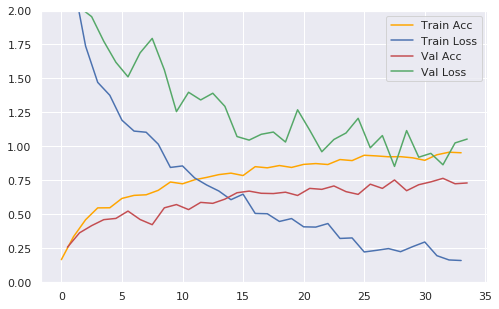

In [30]:
n_epochs=34
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,n_epochs),history1.history['accuracy'], color='orange')
plt.plot(np.arange(0,n_epochs),history1.history['loss'],'b')
plt.plot(np.arange(0,n_epochs)+0.5,history1.history['val_accuracy'],'r')  # offset both validation curves
plt.plot(np.arange(0,n_epochs)+0.5,history1.history['val_loss'],'g')
plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1] 
plt.show() 

***

### CNN Tuning

In [31]:
def build_model_cnn(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hp.Choice('units0', [32, 64, 128 , 256 ]), kernel_size=3, strides=1, activation="elu", kernel_initializer="he_uniform"
                                  ,padding="same", 
                                  input_shape=[28, 28, 1])) 
    model.add(keras.layers.MaxPooling2D(pool_size=2)) 
    model.add(keras.layers.Conv2D(filters=hp.Choice('units1', [32, 64, 128 , 256 ]), kernel_size=3, strides=1, padding="same", activation="elu")) 
    model.add(keras.layers.MaxPooling2D(pool_size=2)) 
    model.add(keras.layers.Conv2D(filters=hp.Choice('units2', [32, 64, 128 , 256 ]), kernel_size=3, strides=1, padding="same", activation="elu")) 
    model.add(keras.layers.Flatten()) 
    model.add(keras.layers.Dense(24, activation = "softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), metrics=["accuracy"])
    
    return model


In [32]:
tuner1 = RandomSearch(
    build_model_cnn,
    seed = 42,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='log_dir',
    project_name='cc9')


tuner1.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project log_dir/cc9/oracle.json
INFO:tensorflow:Reloading Tuner from log_dir/cc9/tuner0.json


In [33]:
stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, verbose=0, mode='auto')

tuner1.search(X_train_np_cc, y_train_np,
             epochs=100,
             validation_data=(X_valid_np_cc, y_valid_np)
             ,callbacks=[stop_callback]
              ,use_multiprocessing=True)

INFO:tensorflow:Oracle triggered exit


In [34]:
tuner1.results_summary()

***

### Explore CNN best model

In [35]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(256, kernel_size=3, strides=1, activation="elu", kernel_initializer="he_uniform", padding="same", 
                                  input_shape=[28, 28, 1])) 
model2.add(keras.layers.MaxPooling2D(pool_size=2)) 
model2.add(keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", activation="elu")) 
model2.add(keras.layers.MaxPooling2D(pool_size=2)) 
model2.add(keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", activation="elu")) 
model2.add(keras.layers.Flatten()) 
model2.add(keras.layers.Dense(24, activation = "softmax"))
model2.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        147520    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)               

In [37]:
history2 = model2.fit(X_train_np_cc, y_train_np,
             epochs=100,
             validation_data=(X_valid_np_cc, y_valid_np)
             ,callbacks=[stop_callback])

Epoch 1/100
79/79 [==============================] - ETA: 0s - loss: 3.5437 - accuracy: 0.03 - ETA: 0s - loss: 3.7202 - accuracy: 0.05 - ETA: 0s - loss: 3.5542 - accuracy: 0.04 - ETA: 0s - loss: 3.4455 - accuracy: 0.06 - ETA: 0s - loss: 3.3381 - accuracy: 0.08 - ETA: 0s - loss: 3.2238 - accuracy: 0.10 - ETA: 0s - loss: 3.0731 - accuracy: 0.13 - ETA: 0s - loss: 2.9045 - accuracy: 0.17 - ETA: 0s - loss: 2.7317 - accuracy: 0.22 - ETA: 0s - loss: 2.6440 - accuracy: 0.24 - 6s 74ms/step - loss: 2.6440 - accuracy: 0.2468 - val_loss: 1.6415 - val_accuracy: 0.4950
Epoch 2/100
79/79 [==============================] - ETA: 0s - loss: 1.5937 - accuracy: 0.50 - ETA: 0s - loss: 1.2717 - accuracy: 0.61 - ETA: 0s - loss: 1.1727 - accuracy: 0.64 - ETA: 0s - loss: 1.0848 - accuracy: 0.66 - ETA: 0s - loss: 1.0331 - accuracy: 0.67 - ETA: 0s - loss: 0.9813 - accuracy: 0.69 - ETA: 0s - loss: 0.9155 - accuracy: 0.71 - ETA: 0s - loss: 0.8757 - accuracy: 0.72 - 1s 6ms/step - loss: 0.8535 - accuracy: 0.7312 - v

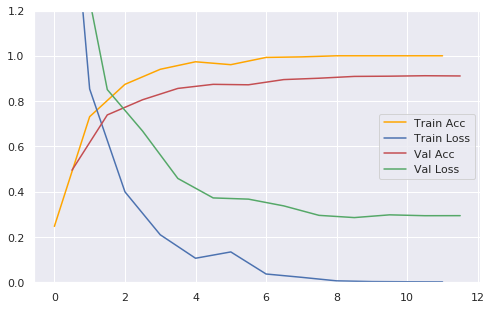

In [38]:
n_epochs=12
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,n_epochs),history2.history['accuracy'], color='orange')
plt.plot(np.arange(0,n_epochs),history2.history['loss'],'b')
plt.plot(np.arange(0,n_epochs)+0.5,history2.history['val_accuracy'],'r')  # offset both validation curves
plt.plot(np.arange(0,n_epochs)+0.5,history2.history['val_loss'],'g')
plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1.2) # set the vertical range to [0-1] 
plt.show() 

### Question 3.4

Once you have performed your systematic optimisation, choose the best network from all of your results.
- Explain why you chose this particular network.
- Were there one or more other networks with very similar performance?  
- If so, did they share particular design features (e.g. size, number of elements, etc)?

### Answer question 3.4 here (no code required)

the best model is a CNN model with score of 0.9190000096956888


with Hyperparameters:

|-learning_rate: 0.001

|-units0: 256

|-units1: 64

|-units2: 64



yes they were models with similar performance. but there were no common feature. 

### 3.5 Show Results 
Take the best network and show the confusion matrix for its predictions.

In [39]:
best_model = tuner1.get_best_models(num_models=1)[0]

In [40]:
from sklearn.metrics import confusion_matrix
# Generate test set predictions
predicted_probabilities = best_model.predict(X_test_np_cc)

# Generate predicted class and ground truth vectors
predictions = np.argmax(predicted_probabilities, axis=1)
labels_flat = np.argmax(y_test_np, axis=1)

mat = confusion_matrix(labels_flat, predictions)

print(mat)

#sns.heatmap(mat, fmt='.2f', linewidths=.5, cmap="Greens")

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 71  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 50  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 42  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0  0  0  1  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 58  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

### Question 3.6
 - What class is misclassified the most, and what class is it most typically misclassified as?
 - Give the class numbers and show example images of these.

In [41]:
images1 = data_train.drop(columns=['label'])

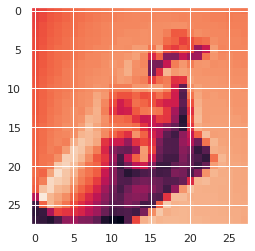

In [42]:
# code here needed to investigate question 3.6

images = images1.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

# class 23
plt.imshow(images[25].reshape(28,28))

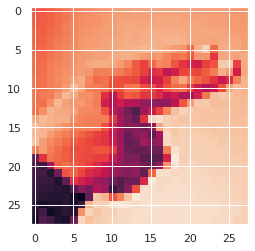

In [43]:
# most confused with class 
plt.imshow(images[49].reshape(28,28))

In [44]:
# Answer question 3.6 here (text answer to questions - separate from the code above)

# class number 7 was most confused with class number 19

### Question 3.7
 - Summarise (in about 2-3 sentences) what you found out about the tuning and model comparisons that you have done in this section.
 - What aspects (if any) do you think might need to be modified for other problems (e.g. those with much larger datasets)? 

In [45]:
# Answer question 3.7 here (no code required)

# increasing the number of layers doesnt mean a good perfomance. 2 layers in FCN was better than 3. 
# CNN perfomance on images far exceeds FCN due the thier ability to maintain spatial information.
# having large number of samples or data is extremely important for deep learning models.
# for large datasets assuming RTX gpus are avalaible. it will be more benefcial to increase the number of batches
# but with training with 16bit instead of 32bit to allow for more data to be saved in gpu mem.

***

## 4. Free Choice Element (10%)

In this section you can choose to investigate **just one** of the following options for improving the classification performance. Make sure that you explain your process and show appropriate results. Again, the final results are not that important - it is the process that counts.

Options are:
 - Implement new layers such as Dropout and BatchNormalization (see chapter 11 of Géron)
 - Try alternative and deeper CNN layouts, varying the number of Conv2D and MaxPooling layers and their ordering
 - Investigate the effects of larger networks, as well as changing at least one of the following: optimiser, activation function, batch size and/or training set size
 - Create an Ensemble of different networks and investigate the performance
 - Explore a different style of deep learning network (e.g. ResNet - see chapter 14 of Géron)
 
Report your findings and show the final results.

In [46]:
# code here

***